# Import libraries

In [1]:
!pip install pycountry
!pip install langdetect
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Clean tweets

In [ ]:
tweet_list = pd.read_csv('./drive/MyDrive/3 Semester/Data Analytics/Final Project/Datasets/Processed/astrazeneca_all.csv', encoding='utf8')
print(tweet_list.shape)
tweet_list.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4,6,10,13,15,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(176336, 31)


,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN


## Remove duplicates

In [ ]:
print(tweet_list.shape)
tweet_list.drop_duplicates(['translated'],inplace = True)
# tweet_list.drop_duplicates(inplace = True)
tweet_list.shape

(176336, 31)


(31905, 31)

## Remove user and RT

In [ ]:
tweet_list["text"] = tweet_list.iloc[:,1]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","" "",str(x))
tweet_list["text"] = tweet_list.text.map(remove_rt).map(rt)
tweet_list["text"] = tweet_list.text.str.lower()
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...


## Remove hashtags

In [ ]:
hs = lambda x: re.sub("(#[A-Za-z0–9]+)","",str(x))
tweet_list["text"] = tweet_list.text.apply(hs)
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...


## Remove space at the beggining and end of tweet

In [ ]:
rtrim = lambda x: str(x).strip()
tweet_list["text"]=tweet_list["text"].apply(rtrim)
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...


## After all the pre-processing, remove duplicates

In [ ]:
tweet_list.drop_duplicates(inplace = True)
tweet_list.shape

(31905, 32)

In [ ]:
tweet_list.drop_duplicates(['text'],inplace=True)
tweet_list.shape

(31692, 32)

In [ ]:
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...


## Assign polarity and subjectivity according to TextBlob's sentiment

In [ ]:
def DetectSentiment(text):
  text = str(text)
  analysis = TextBlob(text)
  language = analysis.detect_language()
  analysis_ready=analysis
  if language == 'en':
    analysis_ready = analysis
  else:
    analysis_ready = analysis.translate(to='en')
  return pd.Series(analysis_ready.sentiment)

tweet_list[['polarity','subjectivity']] = tweet_list['translated'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text,polarity,subjectivity
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...,-0.109091,0.551515
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...,0.000000,0.000000
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...,0.000000,0.000000
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...,0.500000,0.500000
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...,-0.062500,0.220833


## Assign neutrality, positivity and negavitity.

In [ ]:
for index, row in tweet_list['translated'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(str(row))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tweet_list.loc[index, 'sentiment'] = 'negative'
  elif pos > neg:
    tweet_list.loc[index, 'sentiment'] = 'positive'
  else:
    tweet_list.loc[index, 'sentiment'] = 'neutral'
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,is_quote_status,in_reply_to_user_id,in_reply_to_status_id,user_id,user_created_at,user_verified',user_name,user_name_utf8,user_screen_name,user_screen_name_utf8,user_location,user_location_utf8,user_description,user_description_utf8,user_protected,user_statuses_count,user_followers_count,user_favourites_count,user_friends_count,translated,CSV_File,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,False,NaN,NaN,37928746,2009-05-05 14:00:47,False,Samuel Miller,Samuel Miller,Hephaestus7,Hephaestus7,Canada,Canada,"Samuel Miller, 64, a DS specialist, is accusin...","Samuel Miller, 64, a DS specialist, is accusin...",False,363973.0,14993.0,15713.0,16493.0,Coronavirus Live News Mexics Death Toll Passes...,NaN,coronavirus live news mexicos death toll passe...,-0.109091,0.551515,negative,NaN,NaN,NaN,NaN
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,False,NaN,NaN,112284203,2010-02-07 22:54:08,False,BC NewsWire,BC NewsWire,BCNewsWire,BCNewsWire,Canada,Canada,"Breaking Domestic, Local and International New...","Breaking Domestic, Local and International New...",False,53677.0,4342.0,98.0,536.0,Denmark Proongs Suspension of AstraZeneca Covi...,NaN,denmark prolongs suspension of astrazeneca cov...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,False,NaN,NaN,383245009,2011-10-01 14:45:35,False,Tiempo_Ahora.net,Tiempo_Ahora.net,Tiempo_Ahora,Tiempo_Ahora,"Reynosa, Tamaulipas","Reynosa, Tamaulipas","Pagina de noticias, informacion y editorial.","Pagina de noticias, informacion y editorial.",False,9129.0,45.0,9.0,51.0,AstraZeneca Covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,False,NaN,NaN,99114855,2009-12-24 14:37:54,False,ANA LIA TRIFIRO,ANA LIA TRIFIRO,ANALIA2010,ANALIA2010,SAN LUIS,SAN LUIS,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,MEDICA DE LA SALUD PUBLICA.GREMIALISTA DE APTS...,False,1472.0,218.0,1713.0,326.0,More than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,False,NaN,NaN,2828470096,2014-10-13 21:30:32,True,El Pitazo,El Pitazo,ElPitazoTV,ElPitazoTV,Venezuela,Venezuela,El Pitazo suena donde otros callan. Noticias q...,El Pitazo suena donde otros callan. Noticias q...,False,862398.0,826479.0,1560.0,7650.0,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...,-0.062500,0.220833,negative,NaN,NaN,NaN,NaN


In [38]:
# tweet_list.to_csv('./drive/MyDrive/3 Semester/Data Analytics/Final Project/Datasets/Processed/sputnik_SENTIMENT.csv', index=False)

tweet_list = pd.read_csv('astrazeneca_SENTIMENT (2).csv', encoding='utf8')
print(tweet_list.shape)
# tweet_list.head()

(31692, 39)


C:\Users\jessi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,10,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Save neural, positive and negative tweets in separate dataframes.

In [39]:
tw_list_positive = tweet_list[tweet_list['sentiment']=='positive']
tw_list_negative = tweet_list[tweet_list['sentiment']=='negative']
tw_list_neutral = tweet_list[tweet_list['sentiment']=='neutral']

## Calculate percentage of tweets by sentiment.

In [40]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
pc = count_values_in_column(tweet_list,"sentiment")
pc

,Total,Percentage
neutral,11287,35.61
positive,10225,32.26
negative,10180,32.12


## Pie

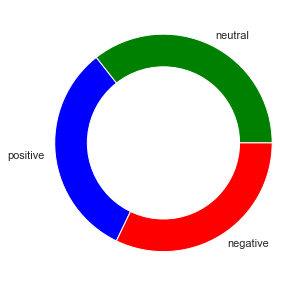

In [41]:
pichart = count_values_in_column(tweet_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Word clouds


In [42]:
import random

def create_wordcloud(text, sentiment="neutral", stopwords=None, save_as=None):
  wordcloud = WordCloud(background_color="white",max_words=1000,repeat=False, stopwords=stopwords).generate(text)
  # wordcloud = WordCloud(background_color="white",max_words=3000,repeat=True).generate(text)

  def custom_color_negative(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl({}, 100%, 55%)".format( random.randint(0, 70))
  def custom_color_positive(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl({}, 100%, 55%)".format( random.randint(89, 195))

  if sentiment=="positive":
    wordcloud.recolor(color_func=custom_color_positive)
  elif sentiment=="negative":
    wordcloud.recolor(color_func=custom_color_negative)

  plt.figure(figsize=(15,15))
  plt.imshow(wordcloud, interpolation='spline36')
  plt.axis("off")
  plt.show()
  if save_as != None:
    wordcloud.to_file(save_as)

### word cloud for **positive**

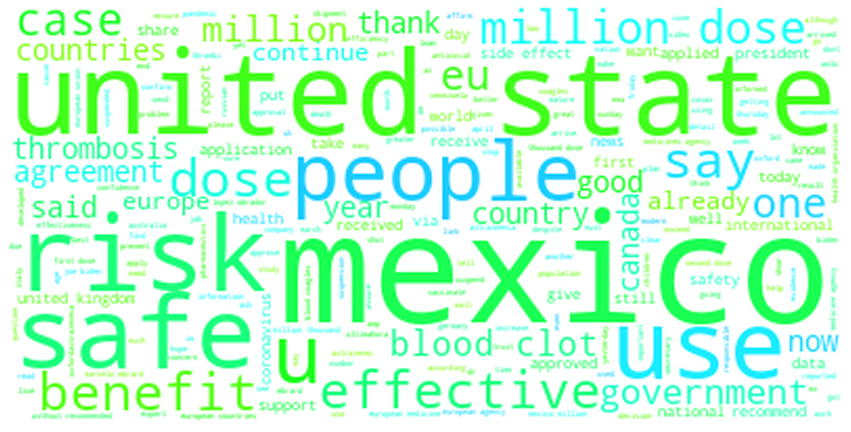

In [43]:
positiveStopWords = set(STOPWORDS)
# stopWords=['mexico','vaccine','covid', 'covid19','astrazeneca','now','de','will','new','us','one','say','australia','vaccine','sinovac','put','day','million'
#             'vaccine','vaccination'
#           ]

# Pfizer
# stopWords=['pfizer','vaccine','vaccine','modern','astrazeneca','will','Vaccine','covid19','VACCINE']

stopWords=['covid','covid19','vaccine','astrazeneca','will','vaccines','new','pfizer','vaccinated','vaccination']
[positiveStopWords.add(item) for item in stopWords]


finalText_positive = ""
for index, row in tw_list_positive['translated'].iteritems():
  finalText_positive += row.lower() + " "

create_wordcloud(finalText_positive, sentiment="positive", stopwords=positiveStopWords, save_as='pfizer_positive_wordcloud.png')

### word cloud for negative

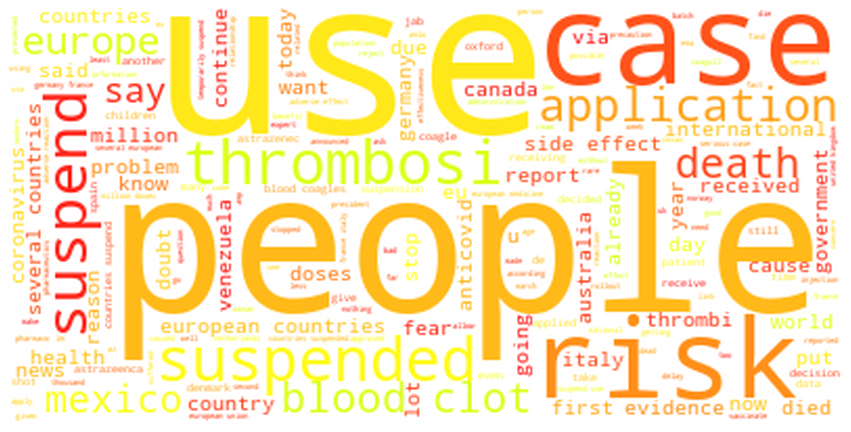

In [44]:
negativeStopWords = set(STOPWORDS)
# stopWords=['mexico','vaccine','covid', 'covid19','astrazeneca','now','de','will','new','us','one','say','australia','vaccine','sinovac','put','day','million'
#             'vaccine','vaccination'
#           ]

# pfizer
# stopWords=['pfizer','vaccine','vaccine','modern','astrazeneca','will','now','people',
#            'az','amp','vaccines','vaccinated','one','covid19','covid','dose','day','vaccination','jampj','got'
#            'first','second','First']

stopWords=['covid','covid19','vaccine','astrazeneca','will','vaccines','new','pfizer','vaccinated','vaccination','one','dose']

[negativeStopWords.add(item) for item in stopWords]

finalText_negative = ""
for index, row in tw_list_negative['translated'].iteritems():
  finalText_negative += row.lower() + " "

create_wordcloud(finalText_negative, sentiment="negative", stopwords=negativeStopWords, save_as='astrazeneca_negative_wordcloud.png')

### word cloud for **neutral**

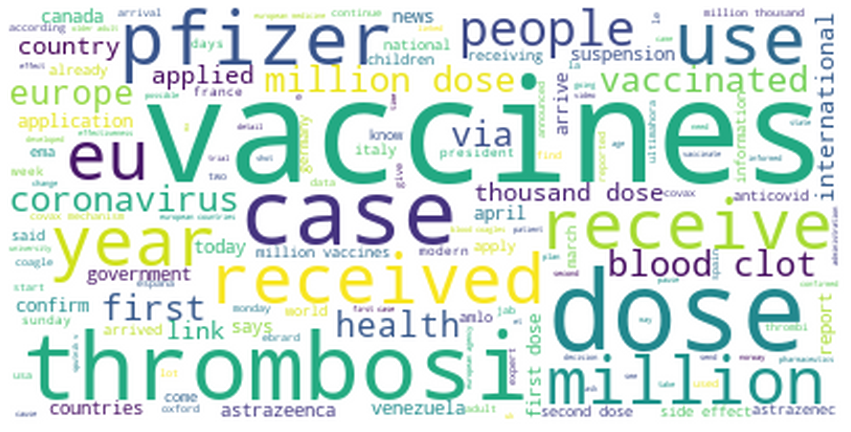

In [45]:
neutralStopWords = set(STOPWORDS)
stopWords=['mexico','vaccine','covid', 'covid19','astrazeneca','now','de','will','new','us','one','say','australia','vaccine','sinovac','put','day','million'
            'vaccine','vaccination'
          ]
[neutralStopWords.add(item) for item in stopWords]

finalText_neutral = ""
for index, row in tw_list_neutral['translated'].iteritems():
  finalText_neutral += str(row).lower() + " "

create_wordcloud(finalText_neutral, stopwords=neutralStopWords)

## N-Grams

In [46]:
tweet_list['translated']= tweet_list['translated'].str.lower()
allText = ''.join(tweet_list['translated'].astype(str).values)

from collections import Counter
from nltk import ngrams
tokens = allText.split()
ngram = Counter(list(ngrams(tokens, 2  )))

ngram.most_common(30)

[(('the', 'astrazeneca'), 7430),
 (('of', 'the'), 7149),
 (('astrazeneca', 'vaccine'), 7037),
 (('of', 'astrazeneca'), 2758),
 (('in', 'the'), 2497),
 (('the', 'vaccine'), 2015),
 (('that', 'the'), 2001),
 (('with', 'the'), 1794),
 (('to', 'the'), 1789),
 (('vaccine', 'against'), 1716),
 (('against', 'the'), 1584),
 (('use', 'of'), 1545),
 (('dose', 'of'), 1477),
 (('with', 'astrazeneca'), 1380),
 (('cases', 'of'), 1282),
 (('astrazeneca', 'vaccines'), 1172),
 (('doses', 'of'), 1111),
 (('vaccine', 'is'), 1068),
 (('and', 'the'), 1048),
 (('for', 'the'), 1040),
 (('the', 'use'), 1035),
 (('will', 'be'), 975),
 (('against', 'covid19'), 968),
 (('it', 'is'), 964),
 (('do', 'not'), 929),
 (('by', 'the'), 929),
 (('there', 'is'), 907),
 (('vaccine', 'and'), 897),
 (('vaccination', 'with'), 886),
 (('on', 'the'), 885)]

### Plot 2-Gram

Text(0.5, 1.0, 'Sinovac 2-Gram')

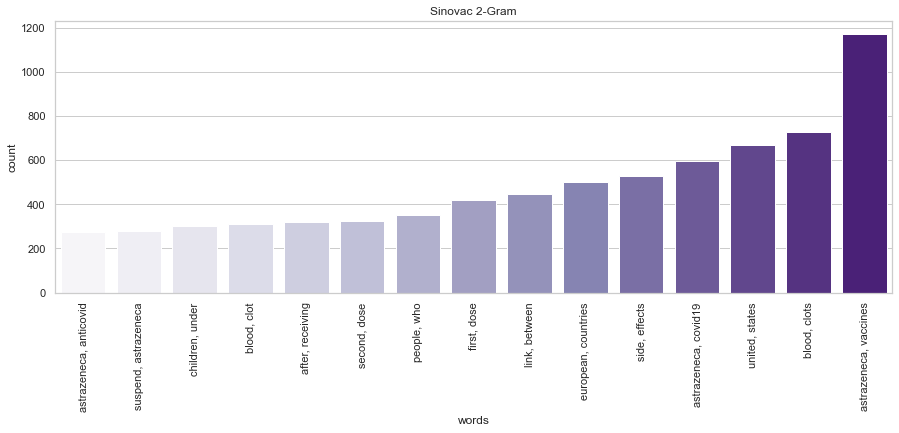

In [47]:
listofNones = ['the','of','in','that','with','to','is','and','for','there','will','by','on',
'from','be','a','if','you','do','thousand','against','does','million','did','we','was','are', 'vaccine','sputnik',
'than','been','or','i','2nd','v','has','over'
]


tokens = allText.split()
example = Counter(list(ngrams(tokens, 2)))
consecutiveWords = [(x, y, {'weight': v}) for (x, y), v in example.most_common(1000) if (x not in listofNones) and (y not in listofNones)]
x_bar = []
y_bar = []
for info in consecutiveWords:
  x_bar.append('{}, {}'.format(info[0], info[1]))
  y_bar.append(info[2]['weight'])

df = pd.DataFrame(np.array([x_bar,y_bar]).T, columns=['words', 'count'])
df['count'] = df['count'].astype('float')
df = df[:15]
df =df[::-1]

import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="words", y="count", data=df, palette='Purples')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Sinovac 2-Gram')
# plt.savefig('astrazeneca_ngram.png')

### Plot 3-Gram

Text(0.5, 1.0, 'Sinovac 3-Gram')

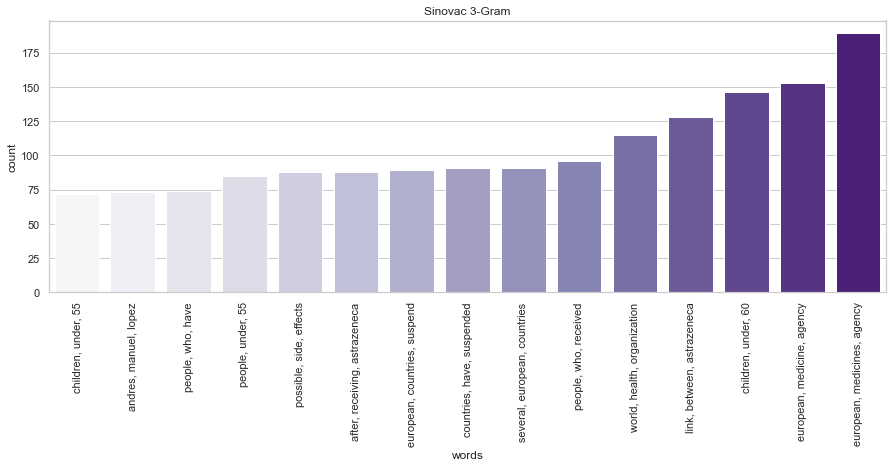

In [48]:
listofNones = ['the','of','in','that','with','to','is','and','for','there','will','by','on',
'from','be','a','if','you','do','thousand','against','does','million','did','we','was','are', 'vaccine','sputnik',
'than','been','or','i','2nd','amp','as','pesos','argentina','years','chancellor'
]

example = Counter(list(ngrams(tokens, 3)))
consecutiveWords = [(x, y, z, {'weight': v}) for (x, y, z), v in example.most_common(1000) if (x not in listofNones) and (y not in listofNones) and (z not in listofNones)]
x_bar = []
y_bar = []
for info in consecutiveWords:
  x_bar.append('{}, {}, {}'.format(info[0], info[1], info[2]))
  y_bar.append(info[3]['weight'])

df = pd.DataFrame(np.array([x_bar,y_bar]).T, columns=['words', 'count'])
df['count'] = df['count'].astype('float')
df = df[:15]
df =df[::-1]

import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="words", y="count", data=df, palette='Purples')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Sinovac 3-Gram')

## NMA: Topic Modeling

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words() + listofNones

tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(4,5))
nmf = NMF(n_components=5)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(tweet_list['translated'].astype(str))

featurestfidf = tfidf_vectorizer.get_feature_names()
n_topwords = 3

for topic_idx, topic in enumerate(nmf.components_):
    message = "Topic {}: {}".format(topic_idx, ", ".join([featurestfidf[i]
                          for i in topic.argsort()[:-n_topwords - 1:-1]]))
    print(message)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jessi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\jessi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'onların', 'printr', 'sekurang', 'setidak', 'tama', 'tidaknya', 'δι', 'арбаң', 'арсалаң', 'афташ', 'бай', 'бале', 'баски', 'батыр', 'баҳри', 'болои', 'бүгжең', 'бұтыр', 'валекин', 'вақте', 'вой', 'вуҷуди', 'гар', 'гарчанде', 'далаң', 'даме', 'ербелең', 'жалт', 'жұлт', 'карда', 'кошки', 'куя', 'күңгір', 'кӣ', 'магар', 'майлаш', 'митың', 'модоме', 'нияти', 'онан', 'оре', 'паһ', 'рӯи', 'салаң', 'сар', 'сұлаң', 'сұрт', 'тарбаң', 'тразе', 'ту', 'тыржың', 'тұрс', 'хом', 'хуб', 'чаро', 'чи', 'чун', 'чунон', 'шарте', 'шұңқ', 'ыржың', 'қадар', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қо

Topic 0: adverse events europe following, europe following immunization astrazeneca covid19, europe following immunization astrazeneca
Topic 1: ema confirms link astrazeneca, responsible ema confirms link, responsible ema confirms link astrazeneca
Topic 2: first serious case thrombosis, case thrombosis associated astrazeneca, first serious case thrombosis associated
Topic 3: countries suspend vaccination astrazeneca, european countries suspend vaccination, european countries suspend vaccination astrazeneca
Topic 4: countries suspend use astrazeneca, european countries suspend use, european countries suspend use astrazeneca


In [50]:
n_topwords = 2
for topic_idx, topic in enumerate(nmf.components_):
    message = "Topic {}: {}".format(topic_idx, ", ".join([featurestfidf[i]
                          for i in topic.argsort()[:-n_topwords - 1:-1]]))
    print(message)

Topic 0: adverse events europe following, europe following immunization astrazeneca covid19
Topic 1: ema confirms link astrazeneca, responsible ema confirms link
Topic 2: first serious case thrombosis, case thrombosis associated astrazeneca
Topic 3: countries suspend vaccination astrazeneca, european countries suspend vaccination
Topic 4: countries suspend use astrazeneca, european countries suspend use


## Exploratory Data Analysis (EDA)

In [51]:
tweet_list.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,translated,CSV_File,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149.0,2021-03-25 23:58:09,NaN,Twitter Web App,False,NaN,https://www.theguardian.com/world/live/2021/ma...,NaN,...,coronavirus live news mexics death toll passes...,NaN,coronavirus live news mexicos death toll passe...,-0.109091,0.551515,negative,NaN,NaN,NaN,NaN
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95.0,2021-03-25 23:57:47,NaN,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,NaN,...,denmark proongs suspension of astrazeneca covi...,NaN,denmark prolongs suspension of astrazeneca cov...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144.0,2021-03-25 23:56:14,NaN,Twitter for Android,False,NaN,http://tiempoahora.net/2021/03/25/vacuna-covid...,NaN,...,astrazeneca covid vaccine has 76 effectiveness...,NaN,vacuna covid de astrazeneca tiene 76 de efecti...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126.0,2021-03-25 23:55:46,NaN,Twitter Web App,False,NaN,https://laverdadmercedes.com/mas-de-200-organi...,NaN,...,more than 200 organizations and personalities ...,NaN,mas de 200 organizaciones y personalidades exi...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141.0,2021-03-25 23:55:02,NaN,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,NaN,...,public transport is paralyzed due to lack of d...,NaN,transporte publico se paraliza por falta de ga...,-0.062500,0.220833,negative,NaN,NaN,NaN,NaN


In [52]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31692 entries, 0 to 31691
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   full_text              31692 non-null  object 
 1   full_text_utf8         31691 non-null  object 
 2   tweet_length           31689 non-null  float64
 3   created_at             31689 non-null  object 
 4   geo                    3 non-null      object 
 5   source                 31614 non-null  object 
 6   truncated              31689 non-null  object 
 7   hashtags               12500 non-null  object 
 8   urls                   21206 non-null  object 
 9   place                  394 non-null    object 
 10  is_quote_status        31689 non-null  object 
 11  in_reply_to_user_id    6489 non-null   float64
 12  in_reply_to_status_id  6149 non-null   float64
 13  user_id                31689 non-null  float64
 14  user_created_at        31689 non-null  object 
 15  us

In [53]:
#We fill de object-type NaN values with "unknown"

tweet_list=tweet_list.fillna("unknown")

### Number of tweets per day since March 07, 2021 to April 12, 2021

In [54]:
dates = tweet_list[~tweet_list['created_at'].str.contains("unknown")]

In [55]:
#We import the datetime library and create the column year

import datetime

dates["year"]=pd.DatetimeIndex(dates["created_at"]).year
df2=dates[dates["year"]==2021]
df2.head()

<ipython-input-55-31985b8101ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates["year"]=pd.DatetimeIndex(dates["created_at"]).year


,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,CSV_File,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,year
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,unknown,Twitter Web App,False,unknown,https://www.theguardian.com/world/live/2021/ma...,unknown,...,unknown,coronavirus live news mexicos death toll passe...,-0.109091,0.551515,negative,unknown,unknown,unknown,unknown,2021
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,unknown,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,unknown,...,unknown,denmark prolongs suspension of astrazeneca cov...,0.000000,0.000000,neutral,0,1,0,0,2021
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,unknown,Twitter for Android,False,unknown,http://tiempoahora.net/2021/03/25/vacuna-covid...,unknown,...,unknown,vacuna covid de astrazeneca tiene 76 de efecti...,0.000000,0.000000,neutral,0,1,0,0,2021
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,unknown,Twitter Web App,False,unknown,https://laverdadmercedes.com/mas-de-200-organi...,unknown,...,unknown,mas de 200 organizaciones y personalidades exi...,0.500000,0.500000,neutral,0,1,0,0,2021
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,unknown,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,unknown,...,unknown,transporte publico se paraliza por falta de ga...,-0.062500,0.220833,negative,unknown,unknown,unknown,unknown,2021


In [56]:
#We do the same for month

df2["month"]=pd.DatetimeIndex(df2["created_at"]).month
df2.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,year,month
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,unknown,Twitter Web App,False,unknown,https://www.theguardian.com/world/live/2021/ma...,unknown,...,coronavirus live news mexicos death toll passe...,-0.109091,0.551515,negative,unknown,unknown,unknown,unknown,2021,3
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,unknown,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,unknown,...,denmark prolongs suspension of astrazeneca cov...,0.000000,0.000000,neutral,0,1,0,0,2021,3
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,unknown,Twitter for Android,False,unknown,http://tiempoahora.net/2021/03/25/vacuna-covid...,unknown,...,vacuna covid de astrazeneca tiene 76 de efecti...,0.000000,0.000000,neutral,0,1,0,0,2021,3
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,unknown,Twitter Web App,False,unknown,https://laverdadmercedes.com/mas-de-200-organi...,unknown,...,mas de 200 organizaciones y personalidades exi...,0.500000,0.500000,neutral,0,1,0,0,2021,3
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,unknown,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,unknown,...,transporte publico se paraliza por falta de ga...,-0.062500,0.220833,negative,unknown,unknown,unknown,unknown,2021,3


In [57]:
#And we do the same for day

df2["day"]=pd.DatetimeIndex(df2["created_at"]).day
df2.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,polarity,subjectivity,sentiment,neg,neu,pos,compound,year,month,day
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,unknown,Twitter Web App,False,unknown,https://www.theguardian.com/world/live/2021/ma...,unknown,...,-0.109091,0.551515,negative,unknown,unknown,unknown,unknown,2021,3,25
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,unknown,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,unknown,...,0.000000,0.000000,neutral,0,1,0,0,2021,3,25
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,unknown,Twitter for Android,False,unknown,http://tiempoahora.net/2021/03/25/vacuna-covid...,unknown,...,0.000000,0.000000,neutral,0,1,0,0,2021,3,25
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,unknown,Twitter Web App,False,unknown,https://laverdadmercedes.com/mas-de-200-organi...,unknown,...,0.500000,0.500000,neutral,0,1,0,0,2021,3,25
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,unknown,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,unknown,...,-0.062500,0.220833,negative,unknown,unknown,unknown,unknown,2021,3,25


In [58]:
#We create a new column with the datetime format

df2['date'] = pd.to_datetime(df2[["year", "month", "day"]])
df2.head()

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,subjectivity,sentiment,neg,neu,pos,compound,year,month,day,date
0,» Coronavirus live news: Mexico's death toll p...,coronavirus live news mexicos death toll passe...,149,2021-03-25 23:58:09,unknown,Twitter Web App,False,unknown,https://www.theguardian.com/world/live/2021/ma...,unknown,...,0.551515,negative,unknown,unknown,unknown,unknown,2021,3,25,2021-03-25
1,#Denmark prolongs suspension of #AstraZeneca C...,denmark prolongs suspension of astrazeneca cov...,95,2021-03-25 23:57:47,unknown,Twitter for iPhone,False,"Denmark,AstraZeneca,cdnpoli",https://www.cp24.com/world/denmark-prolongs-su...,unknown,...,0.000000,neutral,0,1,0,0,2021,3,25,2021-03-25
2,Vacuna covid de AstraZeneca tiene 76% de efect...,vacuna covid de astrazeneca tiene 76 de efecti...,144,2021-03-25 23:56:14,unknown,Twitter for Android,False,unknown,http://tiempoahora.net/2021/03/25/vacuna-covid...,unknown,...,0.000000,neutral,0,1,0,0,2021,3,25,2021-03-25
3,Más de 200 organizaciones y personalidades exi...,mas de 200 organizaciones y personalidades exi...,126,2021-03-25 23:55:46,unknown,Twitter Web App,False,unknown,https://laverdadmercedes.com/mas-de-200-organi...,unknown,...,0.500000,neutral,0,1,0,0,2021,3,25,2021-03-25
4,Transporte público se paraliza por falta de ga...,transporte publico se paraliza por falta de ga...,141,2021-03-25 23:55:02,unknown,Hootsuite Inc.,False,Notaudio,https://cutt.ly/UBtMzCe,unknown,...,0.220833,negative,unknown,unknown,unknown,unknown,2021,3,25,2021-03-25


In [59]:
#Now we count the number of tweets per day

days=set(df2["date"])
tweets=[]
for day in days:
    tweets_day=df2[df2["date"]==day]
    numtweets=len(tweets_day)
    tweets.append(numtweets)

In [60]:
data={"day":list(days),"NumTweets":tweets}
data=pd.DataFrame(data=data)
data

,day,NumTweets
0,2021-03-20,647
1,2021-03-24,965
2,2021-03-07,104
3,2021-03-11,1224
4,2021-04-07,1659
5,2021-04-04,330
6,2021-03-08,133
7,2021-03-29,914
8,2021-03-31,779
9,2021-03-28,274


In [61]:
#We take a look at the average

mean=data[["NumTweets"]].mean().values
print(f"There were {mean} tweets per day.")

There were [856.45945946] tweets per day.


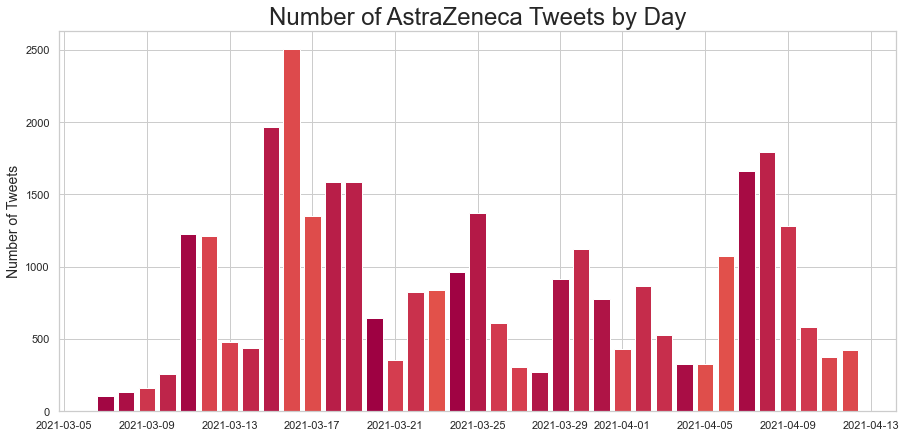

In [62]:
#Now we create the time series for visualization

fig = plt.figure(figsize =(15, 7))

my_cmap = plt.get_cmap("Spectral")
colors = my_cmap(np.arange(0,my_cmap.N)) 

plt.bar(data['day'], data['NumTweets'], color=colors)
plt.title('Number of AstraZeneca Tweets by Day',fontsize=24)
plt.ylabel('Number of Tweets',fontsize=14)
plt.show()

In [63]:
#Next we evaluate the sentiment on the day with the highest number of tweets

mar16 = df2[df2['date'] == '2021-03-16']
mar16.head(5)

,full_text,full_text_utf8,tweet_length,created_at,geo,source,truncated,hashtags,urls,place,...,subjectivity,sentiment,neg,neu,pos,compound,year,month,day,date
24476,@LeonardRoxon Prosecutors in Italy have launch...,prosecutors in italy have launched a manslaugh...,178,2021-03-16 23:59:15,unknown,Twitter for iPhone,False,unknown,unknown,unknown,...,0.950000,negative,unknown,unknown,unknown,unknown,2021,3,16,2021-03-16
24477,¿Te dio amnsiedad cuando te enteraste de los p...,te dio amnsiedad cuando te enteraste de los pr...,175,2021-03-16 23:57:29,unknown,Twitter Media Studio,False,unknown,unknown,unknown,...,0.250000,positive,unknown,unknown,unknown,unknown,2021,3,16,2021-03-16
24478,"“Hace unas horas, la agencia que determina la ...",hace unas horas la agencia que determina la re...,279,2021-03-16 23:57:03,unknown,Twitter Web App,False,Europa,unknown,unknown,...,0.100000,negative,unknown,unknown,unknown,unknown,2021,3,16,2021-03-16
24479,“Hubo varios casos de trombosis que en el tiem...,hubo varios casos de trombosis que en el tiemp...,252,2021-03-16 23:57:03,unknown,Twitter Web App,False,"PaísesBajos,Covid19,Vacuna",unknown,unknown,...,0.200000,neutral,0,1,0,0,2021,3,16,2021-03-16
24480,Ha existido una gran controversia sobre el tem...,ha existido una gran controversia sobre el tem...,185,2021-03-16 23:57:03,unknown,Twitter Web App,False,"Covid19,Vacuna",unknown,unknown,...,0.527778,positive,unknown,unknown,unknown,unknown,2021,3,16,2021-03-16


In [64]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
pc = count_values_in_column(mar16,"sentiment")
pc

,Total,Percentage
negative,961,38.33
neutral,836,33.35
positive,710,28.32


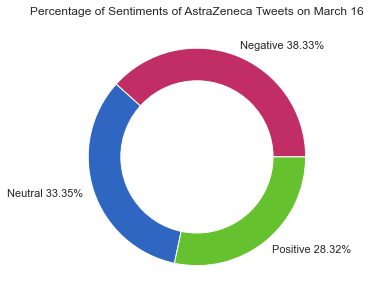

In [65]:
pichart = count_values_in_column(mar16,"sentiment")
names= ['Negative 38.33%', 'Neutral 33.35%', 'Positive 28.32%']
size=pc["Percentage"]
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['#C12E66','#2E66C1','#66C12E'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of Sentiments of AstraZeneca Tweets on March 16')
plt.show()

In [66]:
#First, we create a list of the Mexican states

estados = ['cdmx','aguascalientes','baja california', 'baja california sur', 'campeche','chiapas',
          'chihuahua','coahuila','colima','durango','guanajuato','guerrero','hidalgo','jalisco',
          'toluca','michoacan','morelos','nayarit','nl','nuevo leon', 'oaxaca', 'puebla','queretaro',
          'quintana roo','san luis potosi', 'slp','sinaloa','sonora','tabasco','tamaulipas','veracruz',
          'yucatan','zacatecas']

In [67]:
#We separate the data by region or state

region = tweet_list[['user_location_utf8', 'sentiment']]
region = region['user_location_utf8'].str.lower()
match = region[region.isin([x.lower() for x in estados])]
match = match.to_frame()
counts = match["user_location_utf8"].value_counts(normalize=True)
counts = counts.to_frame()
counts.reset_index(inplace=True)

In [68]:
#We check out the tweet counts by state

counts

,index,user_location_utf8
0,puebla,0.151235
1,san luis potosi,0.131173
2,queretaro,0.114198
3,oaxaca,0.084877
4,veracruz,0.078704
5,aguascalientes,0.063272
6,morelos,0.058642
7,chiapas,0.058642
8,quintana roo,0.055556
9,guanajuato,0.040123


In [69]:
#We only select the 20 states with the highest count of tweets

states_20 = counts.head(20)

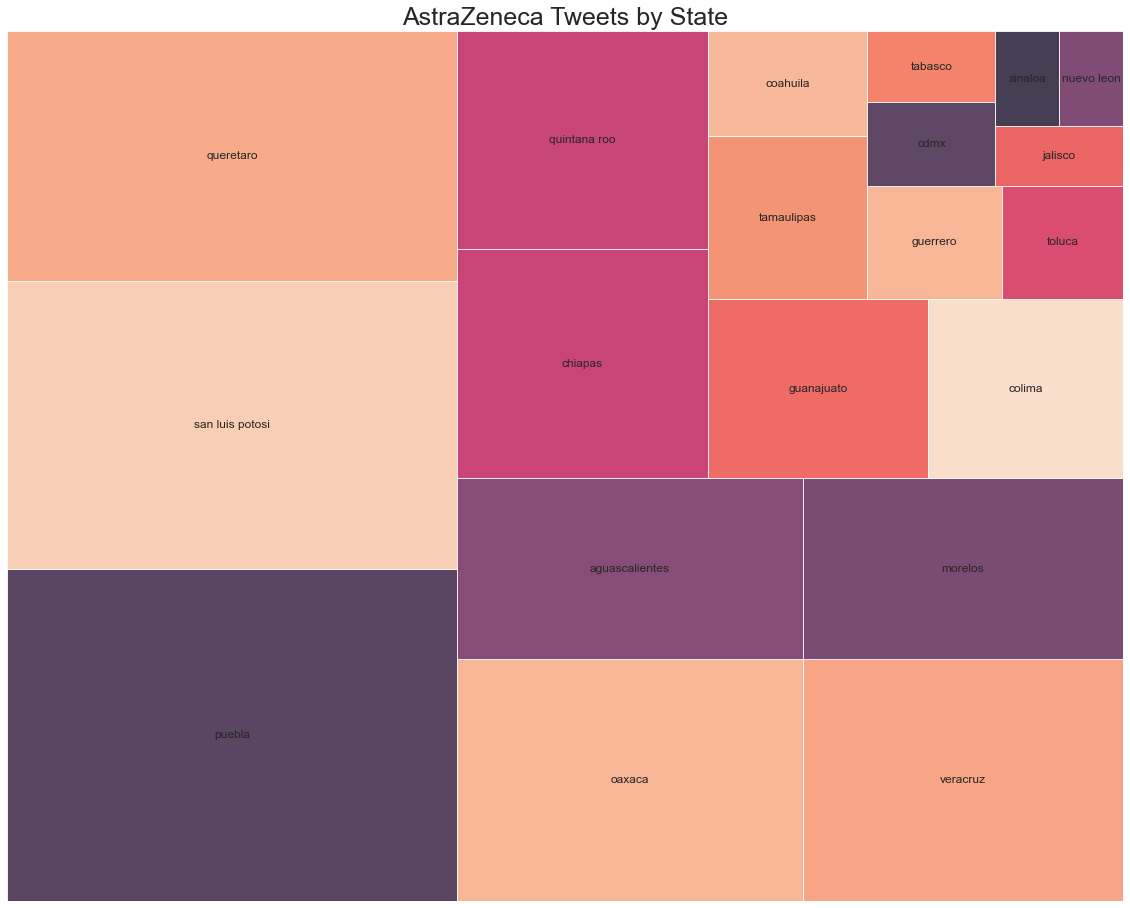

In [71]:
# And we create the treemap for visualization

import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 16)

my_cmap = plt.get_cmap("Spectral")
colors = my_cmap(np.arange(0,my_cmap.N)) 


squarify.plot(sizes=states_20['user_location_utf8'], label=states_20['index']
              ,alpha=.8)
plt.title("AstraZeneca Tweets by State",fontsize=25)
plt.axis('off')
plt.show()

In [73]:
#Now we check out the sentiment on the state with the highest tweet counts

region_sentiment = tweet_list[['user_location_utf8', 'sentiment']]
region_sentiment['user_location_utf8'] = region_sentiment['user_location_utf8'].str.lower()

<ipython-input-73-7f21b6cb8868>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_sentiment['user_location_utf8'] = region_sentiment['user_location_utf8'].str.lower()


In [74]:
region_sentiment.head(5)

,user_location_utf8,sentiment
0,canada,negative
1,canada,neutral
2,"reynosa, tamaulipas",neutral
3,san luis,neutral
4,venezuela,negative


In [75]:
match = region_sentiment[region_sentiment['user_location_utf8'].isin([x.lower() for x in estados])]
match.head(5)

,user_location_utf8,sentiment
233,aguascalientes,positive
290,jalisco,positive
370,san luis potosi,neutral
528,oaxaca,neutral
547,oaxaca,negative


In [76]:
state = match[match['user_location_utf8'] == 'puebla']

In [77]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
pc = count_values_in_column(state,"sentiment")
pc

,Total,Percentage
negative,37,37.76
neutral,36,36.73
positive,25,25.51


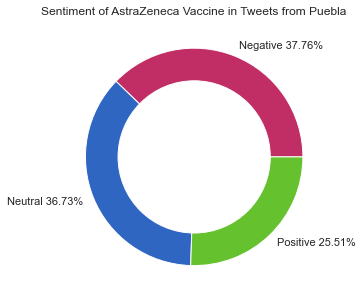

In [78]:
pichart = count_values_in_column(state,"sentiment")
names= ['Negative 37.76%', 'Neutral 36.73%','Positive 25.51%']
size=pc["Percentage"]
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['#C12E66','#2E66C1','#66C12E'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment of AstraZeneca Vaccine in Tweets from Puebla')
plt.show()